# pytorch
## 目的
* 复现论文
* 做实验，实现idea
* 多一项生活技能
## 参考资料
* https://www.learnpytorch.io/
  * https://github.com/mrdbourke/pytorch-deep-learning
* https://time.geekbang.org/column/article/426126


## numpy

## 创建数组
### np.array 深拷贝， np.asarray 浅拷贝

In [2]:

### 一维数组
import numpy as np
arr_1_d = np.asarray([1])
print(arr_1_d)
### 二维数组
arr_2_d = np.asarray([[1,2],[3,4]])
print(arr_2_d)

[1]
[[1 2]
 [3 4]]


In [3]:
## 数组属性
### ndim 数组维度个数
print(arr_1_d.ndim)
print(arr_2_d.ndim)

### shape 数组维度
print(arr_1_d.shape)
print(arr_2_d.shape)

arr_22_d = arr_2_d.reshape((4,1))

### size 元素个数

print(arr_2_d.size)

### dtype 元素类型
"""注意所有numpy数组 类型都一致"""
print(arr_2_d.dtype)

#### 通过astype()改变元素类型，只是创建了一个新的
print(arr_2_d.astype('int32'))
#### 直接修改元素类型会报错
arr_2_d.dtype = 'int32'

print(arr_2_d)

1
2
(1,)
(2, 2)
4
int64
[[1 2]
 [3 4]]
[[1 0 2 0]
 [3 0 4 0]]


In [4]:
### other 创建数组方式
#### 全1
print(np.ones(shape=(2,3), dtype='int32'))

#### 全0
print(np.zeros(shape=(2,3), dtype='int32'))

#### np.arange([start, ]stop, [step, ]dtype=None) 左闭右开空间
print(np.arange(5))
print(np.arange(2,5,1))

#### np.linspace（start, stop, num=50, endpoint=True, retstep=False, dtype=None）
##### 等差数列生成
print(np.linspace(2,10,4))


[[1 1 1]
 [1 1 1]]
[[0 0 0]
 [0 0 0]]
[0 1 2 3 4]
[2 3 4]
[ 2.          4.66666667  7.33333333 10.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


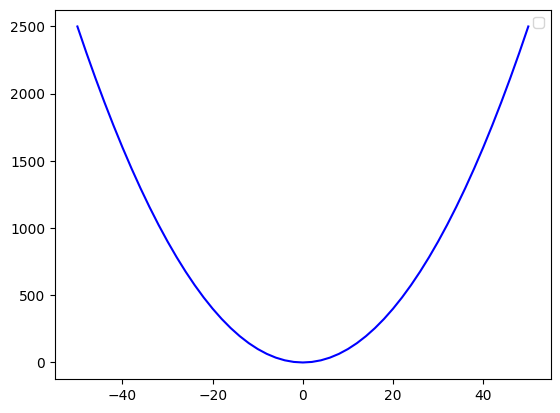

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
X = np.arange(-50, 51, 2)
Y = X ** 2
plt.plot(X, Y, color='blue')
plt.legend()
plt.show()

In [6]:
### 数组 轴
#### 指定轴，表示该轴数据被压缩，(a,b,c) 0轴后 变为(b,c)
#### 轴的方向就是 行序号 或者列序号增长的方向
interest_score = np.random.randint(10, size=(4, 3))
print(interest_score)
print(np.sum(interest_score, axis=0))
print(np.sum(interest_score, axis=1))

[[7 0 3]
 [4 0 8]
 [2 8 4]
 [1 2 8]]
[14 10 23]
[10 12 14 11]


## numpy 应用
* 针对图形处理，主要采用Pillow 和OpenCV,pytorch主要使用Pillow
* Pillow 读取时，通道依次为RGB,以二进制形式，需要手动转为numpy
* OpenCV读取时，通道依次为BGR 

In [7]:
### Pillow
from PIL import Image
im = Image.open('./images/logo.jpg')
print(im.size)
im_pillow = np.asarray(im)
print(im_pillow.shape)

(494, 122)
(122, 494, 4)


In [8]:
### OpenCV
import cv2 

im_cv2 = cv2.imread('./images/logo.jpg')

print(im_cv2.shape)


(122, 494, 3)


(-0.5, 493.5, 121.5, -0.5)

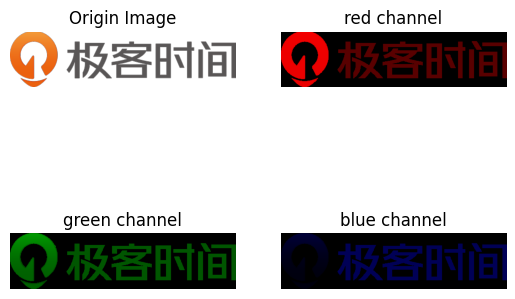

In [9]:
im_pillow_c1 = im_pillow[:,:,0]
im_pillow_c2 = im_pillow[:,:,1]
im_pillow_c3 = im_pillow[:,:,2]
im_pillow_c4 = im_pillow[:,:,3]

zeros = np.zeros((im_pillow.shape[0], im_pillow.shape[1], 1))

# 新增一个channel
im_pillow_c1_new = im_pillow_c1[:,:,np.newaxis]
im_pillow_c1_3ch = np.concatenate((im_pillow_c1_new, zeros, zeros), axis=2)

im_pillow_c2_new = im_pillow_c2[:,:,np.newaxis]
im_pillow_c2_3ch = np.concatenate((zeros, im_pillow_c2_new,  zeros), axis=2)

im_pillow_c3_new = im_pillow_c3[:,:,np.newaxis]
im_pillow_c3_3ch = np.concatenate((zeros, zeros, im_pillow_c3_new), axis=2)


from matplotlib import pyplot as plt 
plt.subplot(2,2,1)
plt.title('Origin Image')
plt.imshow(im_pillow)
plt.axis('off')

plt.subplot(2,2,2)
plt.title('red channel')
plt.imshow(im_pillow_c1_3ch.astype(np.uint8))
plt.axis('off')

plt.subplot(2,2,3)
plt.title('green channel')
plt.imshow(im_pillow_c2_3ch.astype(np.uint8))
plt.axis('off')


plt.subplot(2,2,4)
plt.title('blue channel')
plt.imshow(im_pillow_c3_3ch.astype(np.uint8))
plt.axis('off')

In [10]:
probs = np.array([0.075, 0.15, 0.075, 0.15, 0.0, 0.05, 0.05, 0.2, 0.25])

probs_idx_sort = np.argsort(-probs)  #注意，加了负号，是按降序排序
probs_idx_sort
# 输出：array([8, 7, 1, 3, 0, 2, 5, 6, 4])
#概率最大的前三个值的坐标
probs_idx_sort[:3]
# 输出：array([8, 7, 1])

array([8, 7, 1])

In [11]:
# view 只共享数据，不共享形状

a = np.arange(6)
print(a)
print(a.shape)
b = a.view()
print(b.shape)
b.shape = 2,3
b[0][0]=111
print(a)
print(b)

[0 1 2 3 4 5]
(6,)
(6,)
[111   1   2   3   4   5]
[[111   1   2]
 [  3   4   5]]


In [12]:

scores = np.random.rand(256, 256, 2)
scores[:,:,1] = 1 - scores[:,:,0]

## tensor 张量
* 标量scalar,只有大小，没有方向，rank为0的tensor
* 向量vector，有大小，有方向,rank 为1的tensor
* 矩阵matrix，多个向量合并在一块,rank为2的tensor

In [ ]:
## 创建
from tkinter.messagebox import NO
import torch

#torch.tensor(data,dtype=None, device=None, requires_grad=False)
## data 可以为list,tuple,numpy array,scalar
#requires_grad 是否需要在计算中保留对应的梯度信息，ture时，对这个tensor，以及这个tensor计算出来的其他tensor
#进行求导，然后将导数存在tensor的grad属性中，便于优化器更新参数
#训练阶段 true，便于求导和更新参数
#验证和测试阶段，false，避免这个参数根据loss自动更新
#torch.from_numpy(ndarray)

In [ ]:
#torch.zeros(size, dtype=None...) 
#torch.eye(size, dtype=None...)
#torch.ones(size, dtype=None...)
#torch.rand(size) float 0-1均匀分布
#torch.randn(size) float N(0,1)分布
#torch.normal(mean,std,size) N(mean, std)
#torch.randint(low,high,size) [low,high) 之间的均匀分布


In [15]:
#tensor 转换
import torch
import numpy as np
a=torch.tensor(1)
b=a.item()

# list -- tensor
a=[1,2,3]
b=torch.tensor(a)
c=b.numpy().tolist()

# numpy -- tensor
torch.tensor(np.zeros((2,2)))
#cpu -- gup
##data.cuda()
##data.cpu()



tensor([[0., 0.],
        [0., 0.]], dtype=torch.float64)

In [20]:
#tensor 常用操作

import torch
a = torch.zeros(2, 3, 5)
print(a.shape)
print(a.size())

# 元素数量
print(a.numel())

# 转置 经过转置后的数据 不再连续了！！！
b= a.permute(2,1,0)
print(b.shape)
## transpose 一次只能转置两个维度
c = a.transpose(1,0)

torch.Size([2, 3, 5])
torch.Size([2, 3, 5])
30
torch.Size([5, 3, 2])


In [23]:
## 形状变换
### 改变形状view不能处理 内存不连续的数据，而reshape可以
import torch 
x = torch.randn(4,4)
print(x.shape)
x=x.view(2,8)
print(x.shape)
x=x.permute(1,0)
print(x.shape)
#x=x.view(4,4)
x=x.reshape(4,4)

torch.Size([4, 4])
torch.Size([2, 8])
torch.Size([8, 2])


In [33]:
## 增减维度
import torch 

x=torch.rand(3,4,1)
print(x.shape) 
y=x.squeeze(2) #如果第2维度 的值为1 ，那么删除(维度从0开始)，否则不删除维度
print(y.shape)


x=torch.rand(2,1,3)
y=x.unsqueeze(2) # 指定维度上 新增一个 维度为1的维度
print(y.shape)

torch.Size([3, 4, 1])
torch.Size([3, 4])
torch.Size([2, 1, 1, 3])


In [35]:
## 连接操作
### concat 将多个tensor 在已有的维度上进行连接
#torch.cat(tensors, dim=0, *, out=None) 
import torch 
A = torch.ones(3,3)
B=2*torch.ones(3,3)

C=torch.cat((A,B),0)
print(C.shape)
C=torch.cat((A,B),1)
print(C.shape)

### stack
#torch.stack(inputs, dim=0) dim表示要建立维度的方向
A=torch.arange(0,4)
B=torch.arange(5,9)
C=torch.stack((A,B),0)
print(C)
D=torch.stack((A,B),1)
print(D)


torch.Size([6, 3])
torch.Size([3, 6])
tensor([[0, 1, 2, 3],
        [5, 6, 7, 8]])
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8]])


In [36]:
## tensor 的切分操作
#torch.chunk(input, chunks, dim=0)
## chunks 表示要被划分的块的数量,实际切分时，先做除法，在向上取整数，大于可切分的数量时，每块数量为1
import torch 
A=torch.tensor([1,2,3,4,5,6,7,8,9,10])
B=torch.chunk(A,2,0)
print(B)

#torch.split(tensor, split_size_or_sections, dim=0)
## 每份按照确定的大小切分
 


(tensor([1, 2, 3, 4, 5]), tensor([ 6,  7,  8,  9, 10]))
